# Ratio de Sharpe et valeurs du portefeuille

**Dans le cadre de ce projet, nous allons créer un portefeuille et investir un million de dollars, calculer le risque et essayer d'optimiser la répartition du portefeuille afin de minimiser le risque.**

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf

In [27]:
sns.set(rc={"figure.figsize":(16,9)} , font_scale=1.3 , palette='Set1' , style='whitegrid')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Création d'un portefeuille

In [28]:
aapl = pd.read_csv("AAPL_CLOSE")
cisco = pd.read_csv("CISCO_CLOSE")
ibm = pd.read_csv("IBM_CLOSE")
amzn = pd.read_csv("AMZN_CLOSE")

In [29]:
aapl.head()

,Date,Adj. Close
0,2012-01-03,53.063
1,2012-01-04,53.348
2,2012-01-05,53.941
3,2012-01-06,54.505
4,2012-01-09,54.418


## Rendement cumulatif

In [30]:
data = [aapl , cisco,ibm,amzn]
for df in data:
    df['Cumulative Return'] = df['Adj. Close']/df['Adj. Close'].iloc[0]
    df['Date'] = pd.to_datetime(df['Date'])
    df.index = df.Date.values

In [31]:
aapl.head()

,Date,Adj. Close,Cumulative Return
2012-01-03,2012-01-03,53.063,1.000
2012-01-04,2012-01-04,53.348,1.005
2012-01-05,2012-01-05,53.941,1.017
2012-01-06,2012-01-06,54.505,1.027
2012-01-09,2012-01-09,54.418,1.026


## Les allocations

Supposons que nous ayons les allocations suivantes pour notre portefeuille total:

* 30% dans Apple
* 20% dans Cisco
* 40% sur Amazon
* 10% à IBM

Faisons en sorte que ces valeurs soient reflétées en multipliant notre rendement comulatif par nos allocations.

In [32]:
Allocations = [0.3,0.2,0.4,0.1]
for df , p in zip(data , Allocations):
    df['Allocation'] = df['Cumulative Return']*p

In [33]:
aapl.head()

,Date,Adj. Close,Cumulative Return,Allocation
2012-01-03,2012-01-03,53.063,1.000,0.300
2012-01-04,2012-01-04,53.348,1.005,0.302
2012-01-05,2012-01-05,53.941,1.017,0.305
2012-01-06,2012-01-06,54.505,1.027,0.308
2012-01-09,2012-01-09,54.418,1.026,0.308


## Investissement

Faisons comme si nous avions investi un million de dollars dans ce portefeuille

In [34]:
for df in data:
    df['investment value'] = df["Allocation"]*1000000

In [35]:
aapl.head()

,Date,Adj. Close,Cumulative Return,Allocation,investment value
2012-01-03,2012-01-03,53.063,1.000,0.300,300000.000
2012-01-04,2012-01-04,53.348,1.005,0.302,301612.236
2012-01-05,2012-01-05,53.941,1.017,0.305,304960.728
2012-01-06,2012-01-06,54.505,1.027,0.308,308148.725
2012-01-09,2012-01-09,54.418,1.026,0.308,307659.947


In [36]:
aapl.tail()

,Date,Adj. Close,Cumulative Return,Allocation,investment value
2016-12-23,2016-12-23,115.548,2.178,0.653,653264.617
2016-12-27,2016-12-27,116.282,2.191,0.657,657413.397
2016-12-28,2016-12-28,115.786,2.182,0.655,654610.167
2016-12-29,2016-12-29,115.756,2.181,0.654,654441.973
2016-12-30,2016-12-30,114.854,2.164,0.649,649340.096


## Valeur totale du portefeuille

In [37]:
p_total = pd.concat([aapl['investment value'],cisco['investment value'],ibm['investment value'],amzn['investment value']] , axis=1)
p_total.columns = ['aapl inv val','cisco inv val','ibm inv val','amzn inv val']
p_total['Total'] = p_total.sum(axis=1)

In [38]:
p_total.head()

,aapl inv val,cisco inv val,ibm inv val,amzn inv val,Total
2012-01-03,300000.000,200000.000,400000.000,100000.000,1000000.000
2012-01-04,301612.236,203864.734,398368.223,99150.980,1002996.174
2012-01-05,304960.728,203113.258,396478.798,99206.837,1003759.620
2012-01-06,308148.725,202361.782,391926.999,101999.665,1004437.171
2012-01-09,307659.947,203650.027,389887.279,99737.474,1000934.727


In [39]:
p_total.tail()

,aapl inv val,cisco inv val,ibm inv val,amzn inv val,Total
2016-12-23,653264.617,377469.016,407359.956,424839.412,1862933.001
2016-12-27,657413.397,379323.596,408410.671,430877.507,1876025.171
2016-12-28,654610.167,376108.990,406089.323,431285.259,1868093.739
2016-12-29,654441.973,376603.545,407091.168,427386.472,1865523.158
2016-12-30,649340.096,373636.215,405600.618,418851.589,1847428.518


In [40]:
p_total.iplot()

# Statistiques du portefeuille
### Retours quotidiens

In [41]:
p_total['Daily return'] = p_total.Total.pct_change(1)

In [42]:
p_total.head()

,aapl inv val,cisco inv val,ibm inv val,amzn inv val,Total,Daily return
2012-01-03,300000.000,200000.000,400000.000,100000.000,1000000.000,nan
2012-01-04,301612.236,203864.734,398368.223,99150.980,1002996.174,0.003
2012-01-05,304960.728,203113.258,396478.798,99206.837,1003759.620,0.001
2012-01-06,308148.725,202361.782,391926.999,101999.665,1004437.171,0.001
2012-01-09,307659.947,203650.027,389887.279,99737.474,1000934.727,-0.003


### Le ratio de Sharpe est une mesure permettant de calculer le rendement corrigé du risque
Ratio de Sharpe = (Rendement moyen du portefeuille - Taux sans risque) / Écart type du rendement du portefeuille
si nous mettons de l'argent sur banc, nous pourrions obtenir un taux bas proche de 0

In [43]:
SR = p_total['Daily return'].mean()/p_total['Daily return'].std()

In [44]:
SR

0.05149680662647716

### Ratio de sharpe annuel

In [45]:
ASR = (252**0.5)*SR
ASR

0.81748646188585

### 0,81 indique que ce portefeuille pourrait être risqué

# optimiser le portefeuille

In [46]:
stocks = pd.concat([aapl['Adj. Close'],cisco ['Adj. Close'],ibm['Adj. Close'],amzn['Adj. Close']] , axis=1)
stocks.columns = ['aapl' , 'cisco' , 'ibm' ,'amzn']
stocks.head()

,aapl,cisco,ibm,amzn
2012-01-03,53.063,15.753,160.831,179.030
2012-01-04,53.348,16.057,160.175,177.510
2012-01-05,53.941,15.998,159.415,177.610
2012-01-06,54.505,15.939,157.585,182.610
2012-01-09,54.418,16.040,156.765,178.560


### retour logaritme

In [47]:
log_ret=np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
2012-01-03,nan,nan,nan,nan
2012-01-04,0.005,0.019,-0.004,-0.009
2012-01-05,0.011,-0.004,-0.005,0.001
2012-01-06,0.010,-0.004,-0.012,0.028
2012-01-09,-0.002,0.006,-0.005,-0.022


**Maintenant, nous allons créer 20000 portefeuilles avec une allocation différente, et nous allons voir quelle application présente le risque le plus faible (ratio du sharpe supérieur)**

In [48]:
np.random.seed(101)
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [49]:
print("le retour de sharpe le plus élevé c'est : "  + str(sharpe_arr.max()) )
print("à l'index : "  + str(sharpe_arr.argmax()) )
print("les meilleures allocations sont " + str(all_weights[sharpe_arr.argmax(),:]))

le retour de sharpe le plus élevé c'est : 1.0303260551271065
à l'index : 1420
les meilleures allocations sont [0.26188068 0.20759516 0.00110226 0.5294219 ]


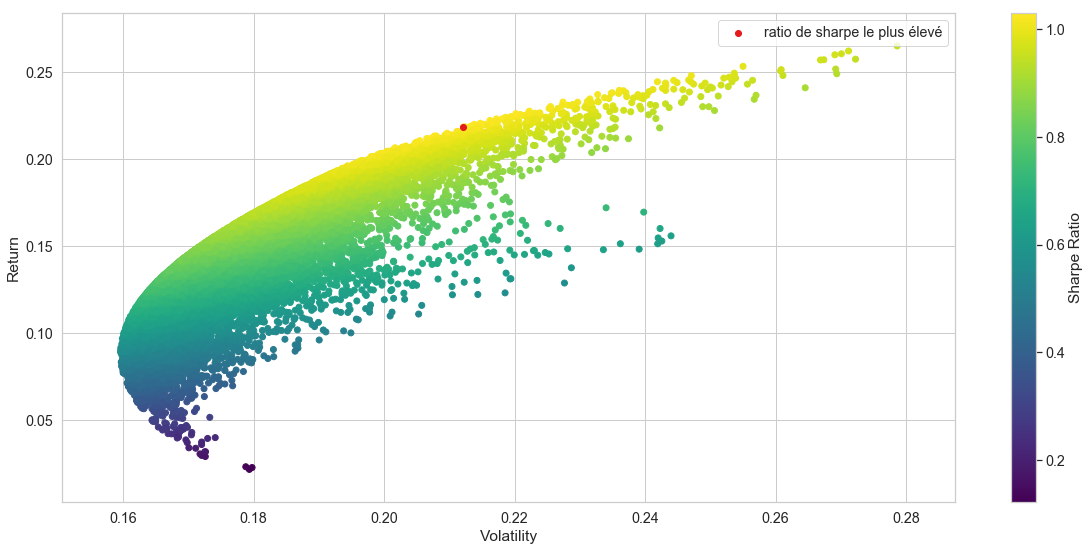

In [50]:
plt.figure(figsize=(20,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol_arr[1420],ret_arr[1420] , label='ratio de sharpe le plus élevé')
plt.legend()